In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [4]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]

)

In [5]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [6]:
X = preprocessor.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Evaluate Function

In [8]:
def evaluate_function(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)
    return mae, rmse, r2_squared

In [11]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_squared = evaluate_function(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_squared = evaluate_function(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set')
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- r2_score: {:.4f}".format(model_train_r2_squared))

    print('----------------------------------------------')

    print('Model Performance for test set')
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- r2_score: {:.4f}".format(model_test_r2_squared))
    r2_list.append(model_test_r2_squared)

    print('='*35)
    print('\n')

LinearRegression
Model Performance for training set
- Root mean squared error: 5.3402
- mean absolute error: 4.2723
- r2_score: 0.8735
----------------------------------------------
Model Performance for test set
- Root mean squared error: 5.4214
- mean absolute error: 4.2253
- r2_score: 0.8792


Lasso
Model Performance for training set
- Root mean squared error: 6.5938
- mean absolute error: 5.2063
- r2_score: 0.8071
----------------------------------------------
Model Performance for test set
- Root mean squared error: 6.5197
- mean absolute error: 5.1579
- r2_score: 0.8253


Ridge
Model Performance for training set
- Root mean squared error: 5.3233
- mean absolute error: 4.2650
- r2_score: 0.8743
----------------------------------------------
Model Performance for test set
- Root mean squared error: 5.3904
- mean absolute error: 4.2111
- r2_score: 0.8806


K-Neighbors Regressor
Model Performance for training set
- Root mean squared error: 5.7091
- mean absolute error: 4.5175
- r2_sc

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879216
6,AdaBoostRegressor,0.856682
5,CatBoostRegressor,0.851632
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,DecisionTreeRegressor,0.759882


### Linear Regression

In [13]:
lr = LinearRegression(fit_intercept=True)
lr_model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 87.92


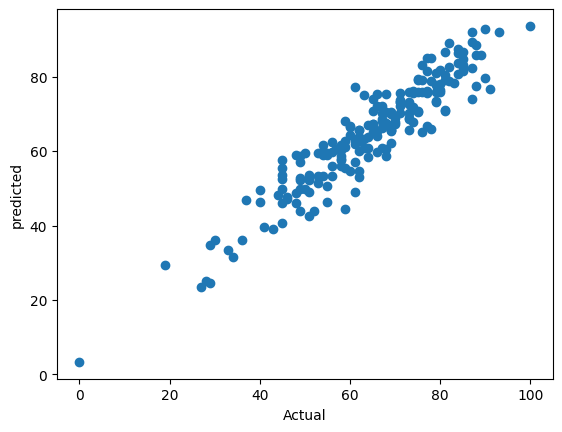

In [15]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual");
plt.ylabel("predicted");

<Axes: xlabel='math_score'>

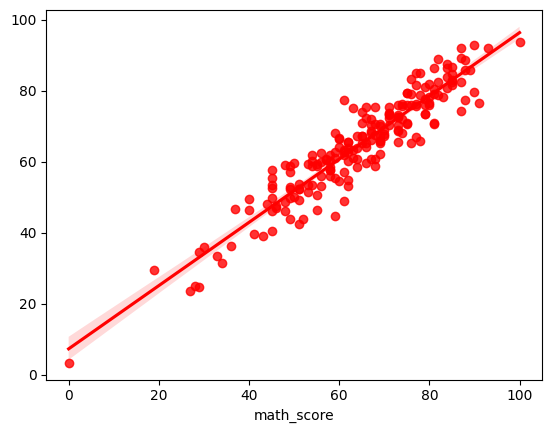

In [17]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, color='red')

### Difference between Actual and Predicted Values

In [20]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
